In [4]:
%run ../common-imports.ipynb

#  SMILEY dataset: k-Means Clustering



we will find clusters in this dataset, using the k-means clustering algorithm.

In [5]:
source = '../../datasets/smiley.csv'
raw_data = pd.read_csv(source)
scaler = StandardScaler()
scaled = scaler.fit_transform(raw_data)
data = pd.DataFrame(data={'x1':scaled[:, 0], 'x2': scaled[:,1]})
data['label'] = raw_data['t']
data.describe(include="all").transpose()#.style.set_table_styles(sv_table_styles())

count          mean       std       min       25%       50%       75%  \
x1     1394.0  3.376862e-16  1.000359 -2.674196 -0.881257 -0.026005  0.932291   
x2     1394.0 -2.828122e-16  1.000359 -1.903850 -0.815578 -0.093834  1.091726   
label  1394.0  4.650646e+00  1.750985  0.000000  4.000000  5.000000  6.000000   

            max  
x1     2.148192  
x2     1.471829  
label  7.000000

**Sample rows**

In [6]:
data.sample(5)

x1        x2  label
322  -1.252210 -0.591589      5
1106 -1.741662  1.109826      7
978  -0.819432  1.281777      7
526   0.772575 -1.252244      5
636   1.158984 -0.985267      5

## Data Visualization

first visualize a scatter plot of the data and look at the histogram of the features. Finally, let us pull of this together with a kernel density plot, into a single plot with subplots.

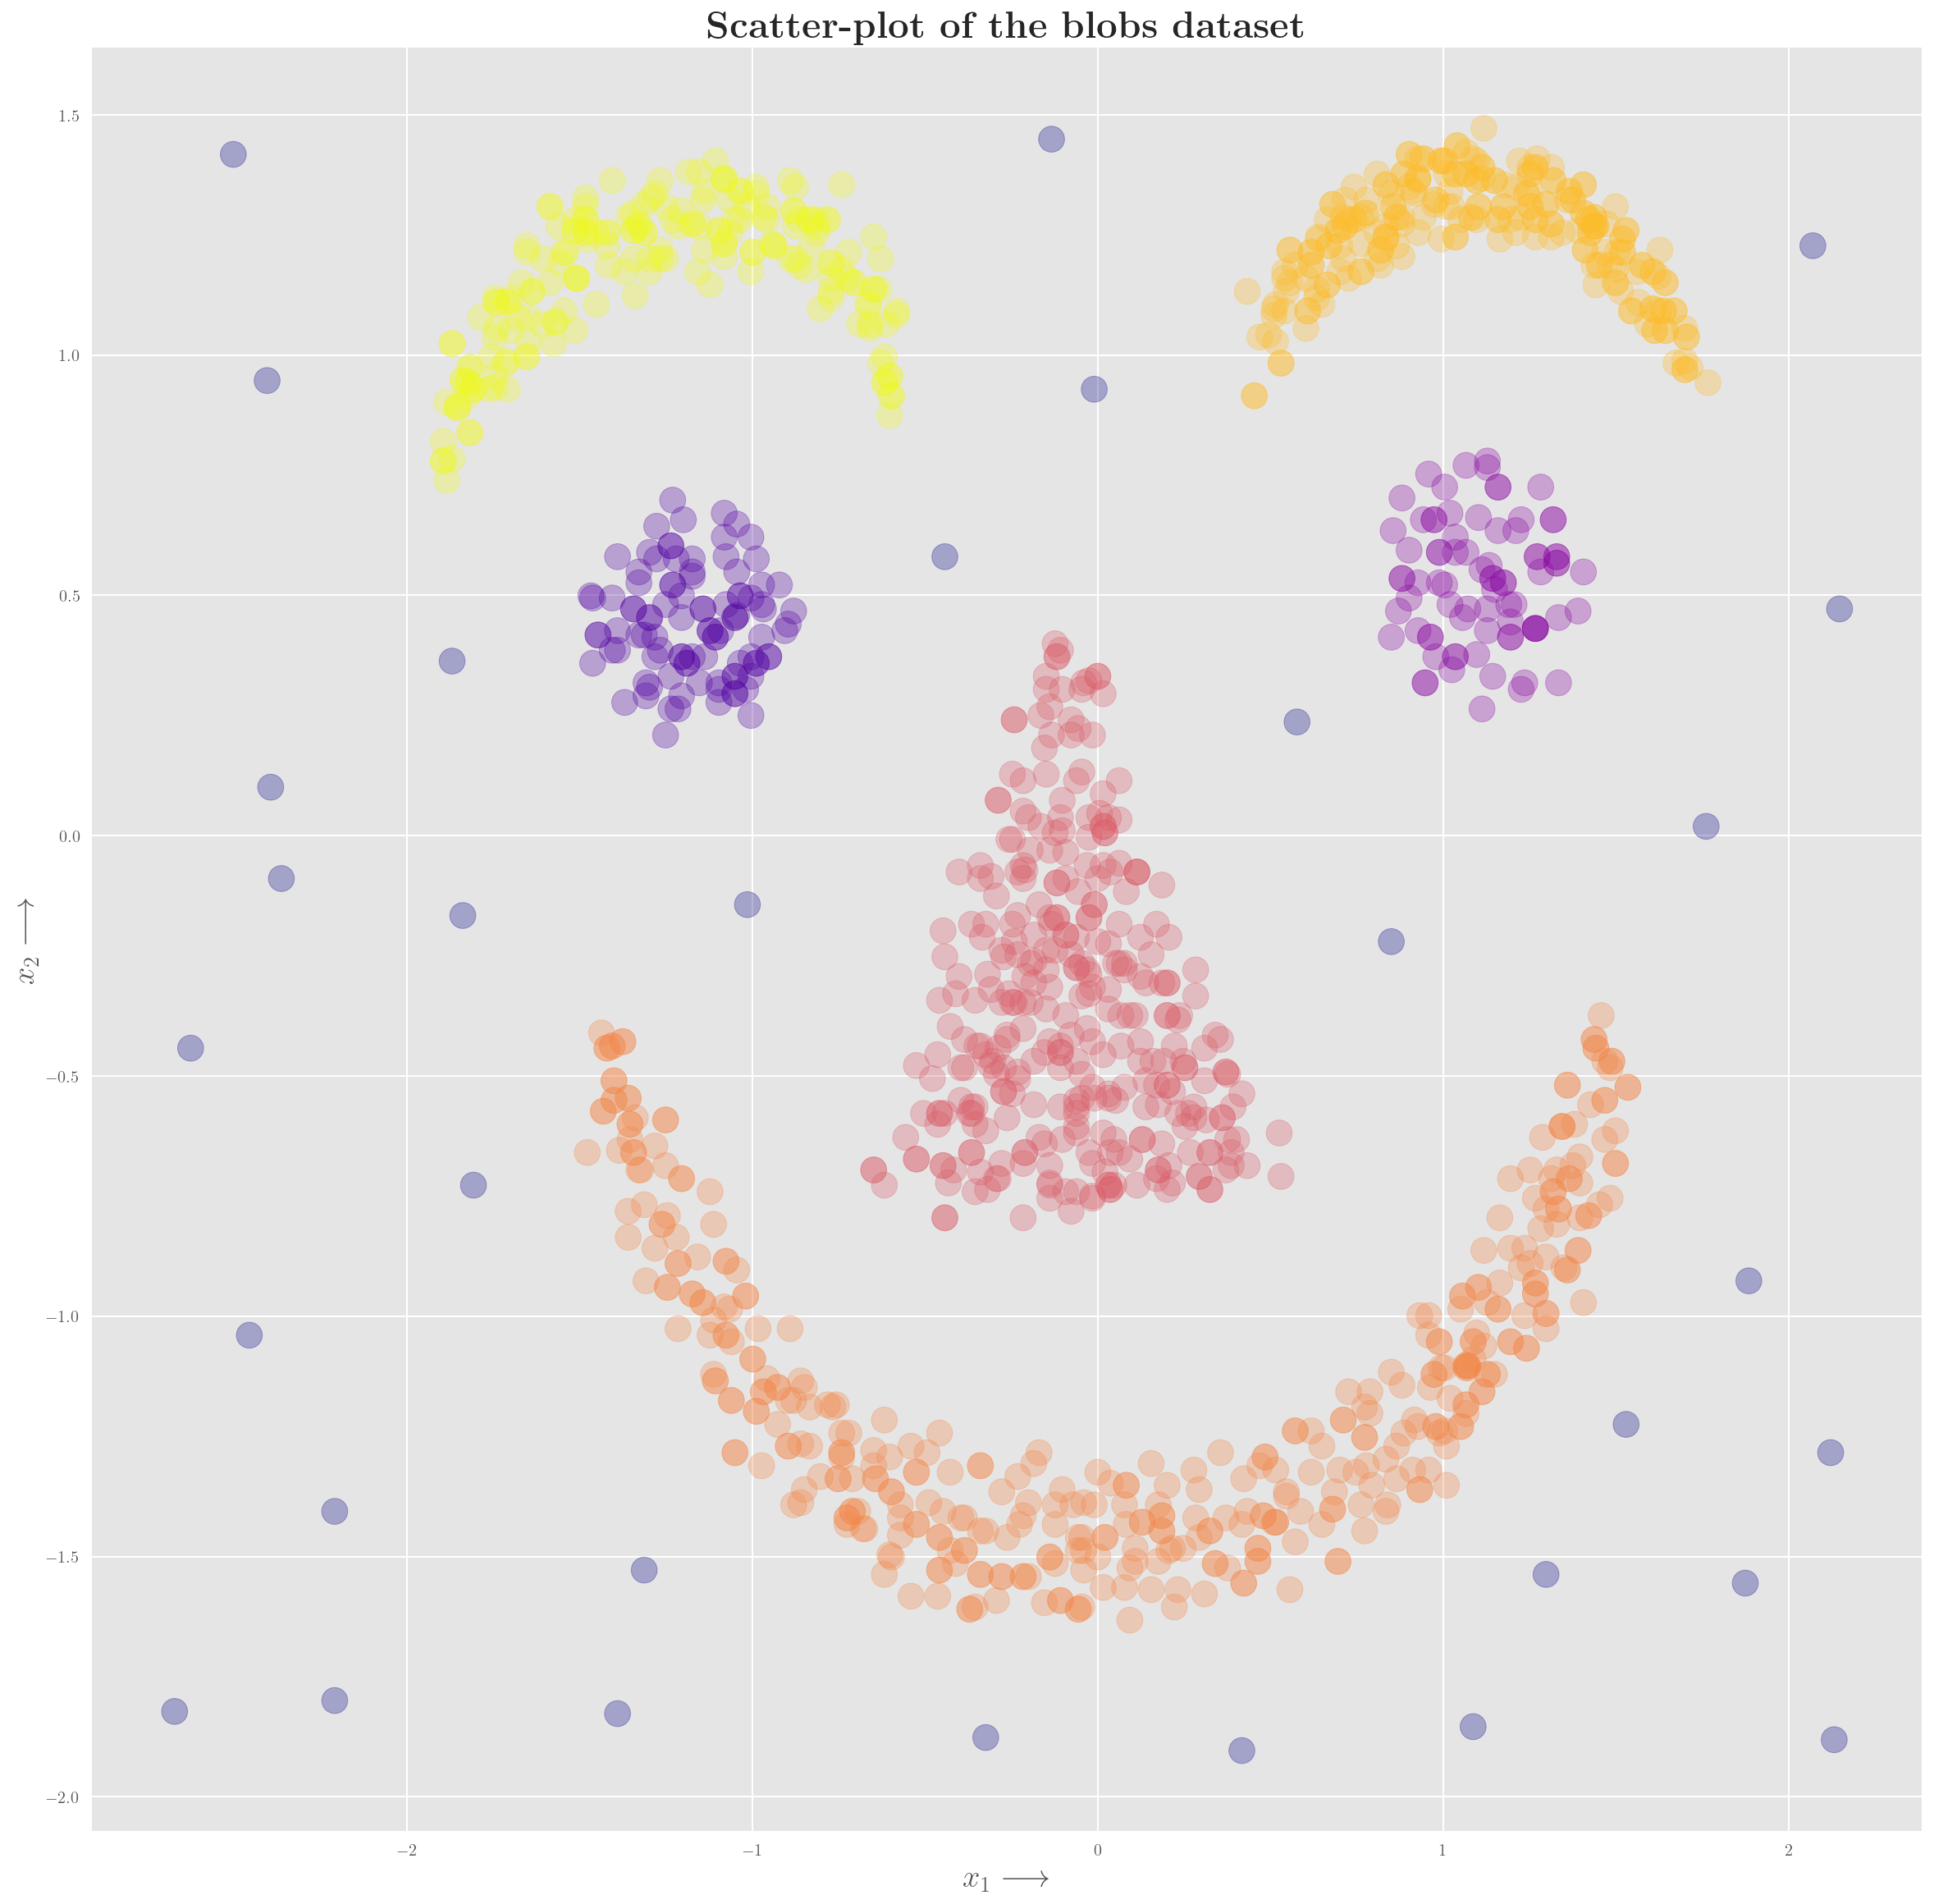

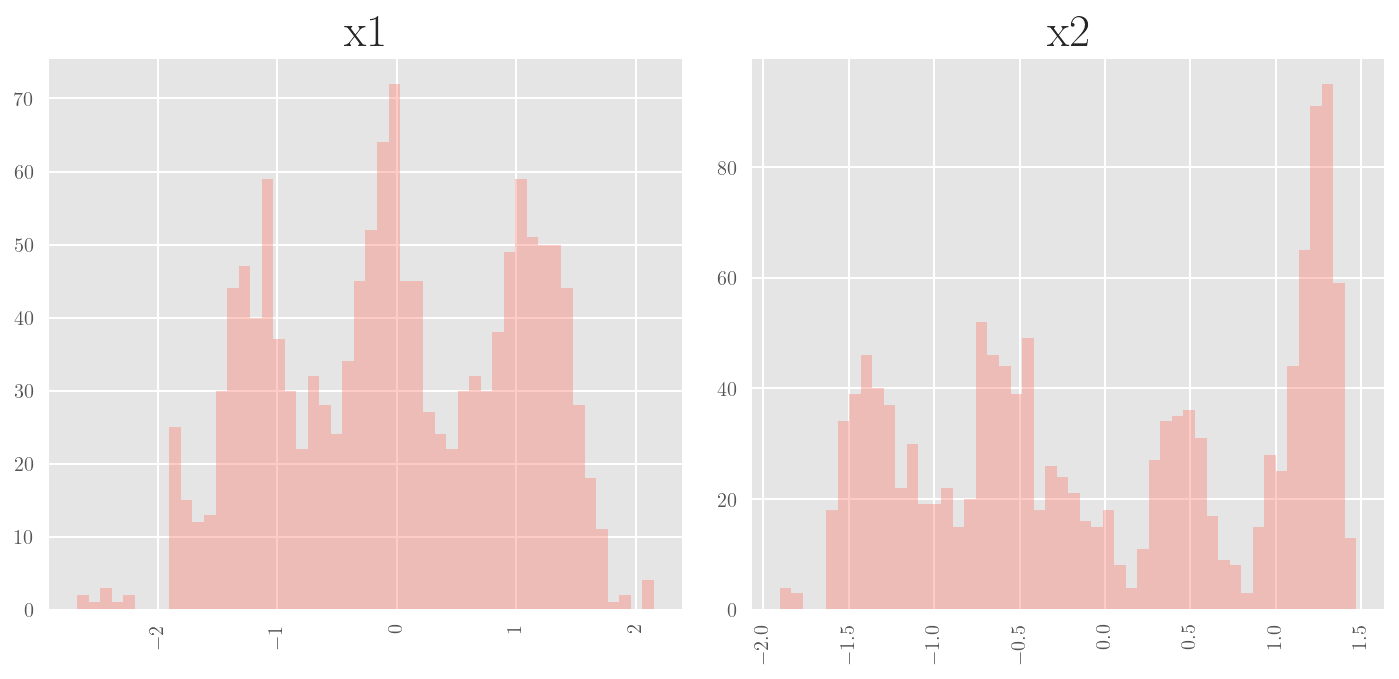

In [7]:
plt.figure(figsize=(20,20))
plt.scatter(data['x1'], data['x2'], alpha=0.3, s=250, cmap='plasma', c=data['label'])
plt.title(r'\textbf{Scatter-plot of the blobs dataset}')
plt.xlabel(r'$x_1\longrightarrow$')
plt.ylabel(r'$x_2\longrightarrow$')
plt.show()
data.drop(columns=['label']).hist(bins=50, alpha=0.4, color='salmon', xrot=90, figsize=(10, 5))
plt.tight_layout()

<Figure size 5760x5760 with 0 Axes>

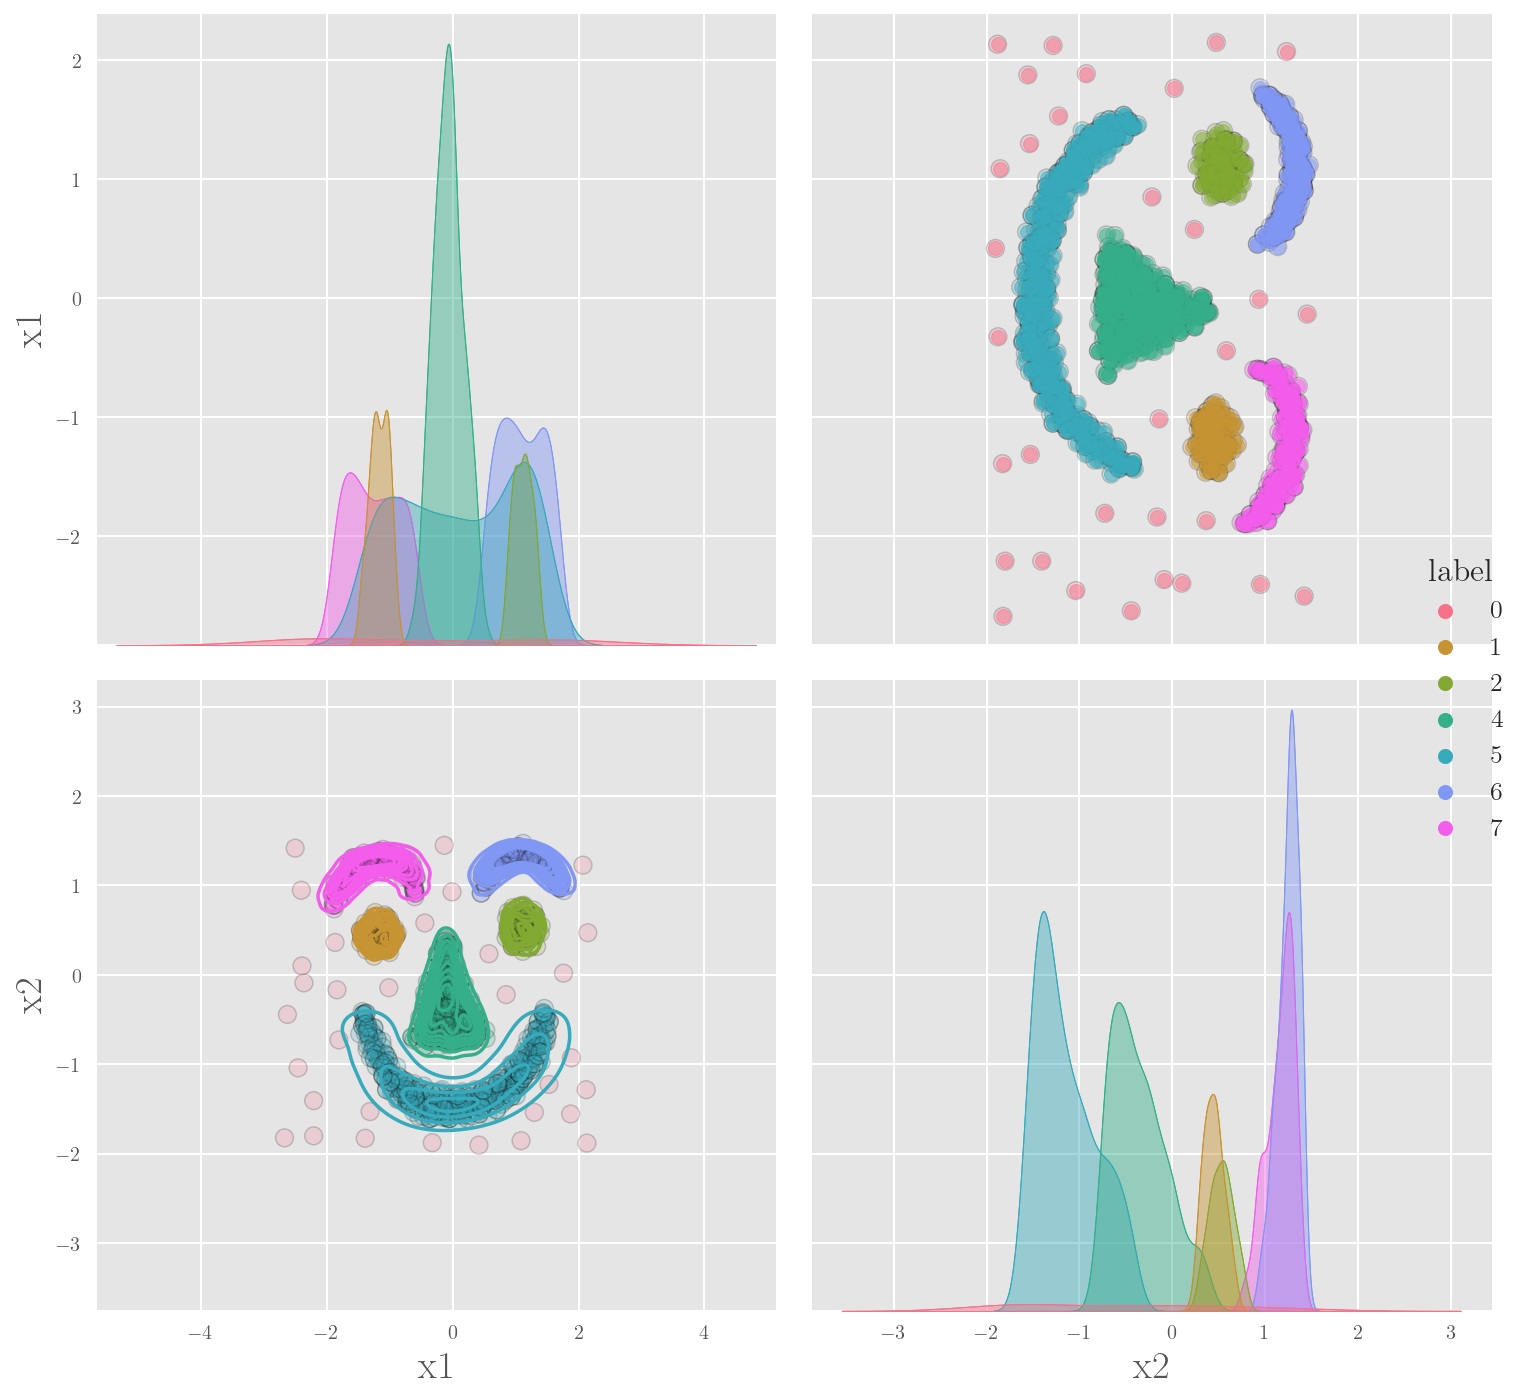

In [8]:
sns.set_palette("plasma")
plt.figure(figsize=(40,40));

sample = data.copy()
sample.label = sample.label.astype('category')
g = sns.pairplot(sample, diag_kind='kde', 
                   plot_kws = { 'alpha': 0.20, 's': 80, 'edgecolor': 'k', }, 
                   size=5, hue='label');
g.map_diag(sns.kdeplot,  shade=True);
g.map_upper(plt.scatter,  alpha=0.5);
g.map_lower(sns.kdeplot, shade=False, shade_lowest=False, cbar=False);

plt.tight_layout();

## k-Means Clustering

Let us now cluster this data for various values of the hyper-parameter: $k$ (the number of clusters to detect).

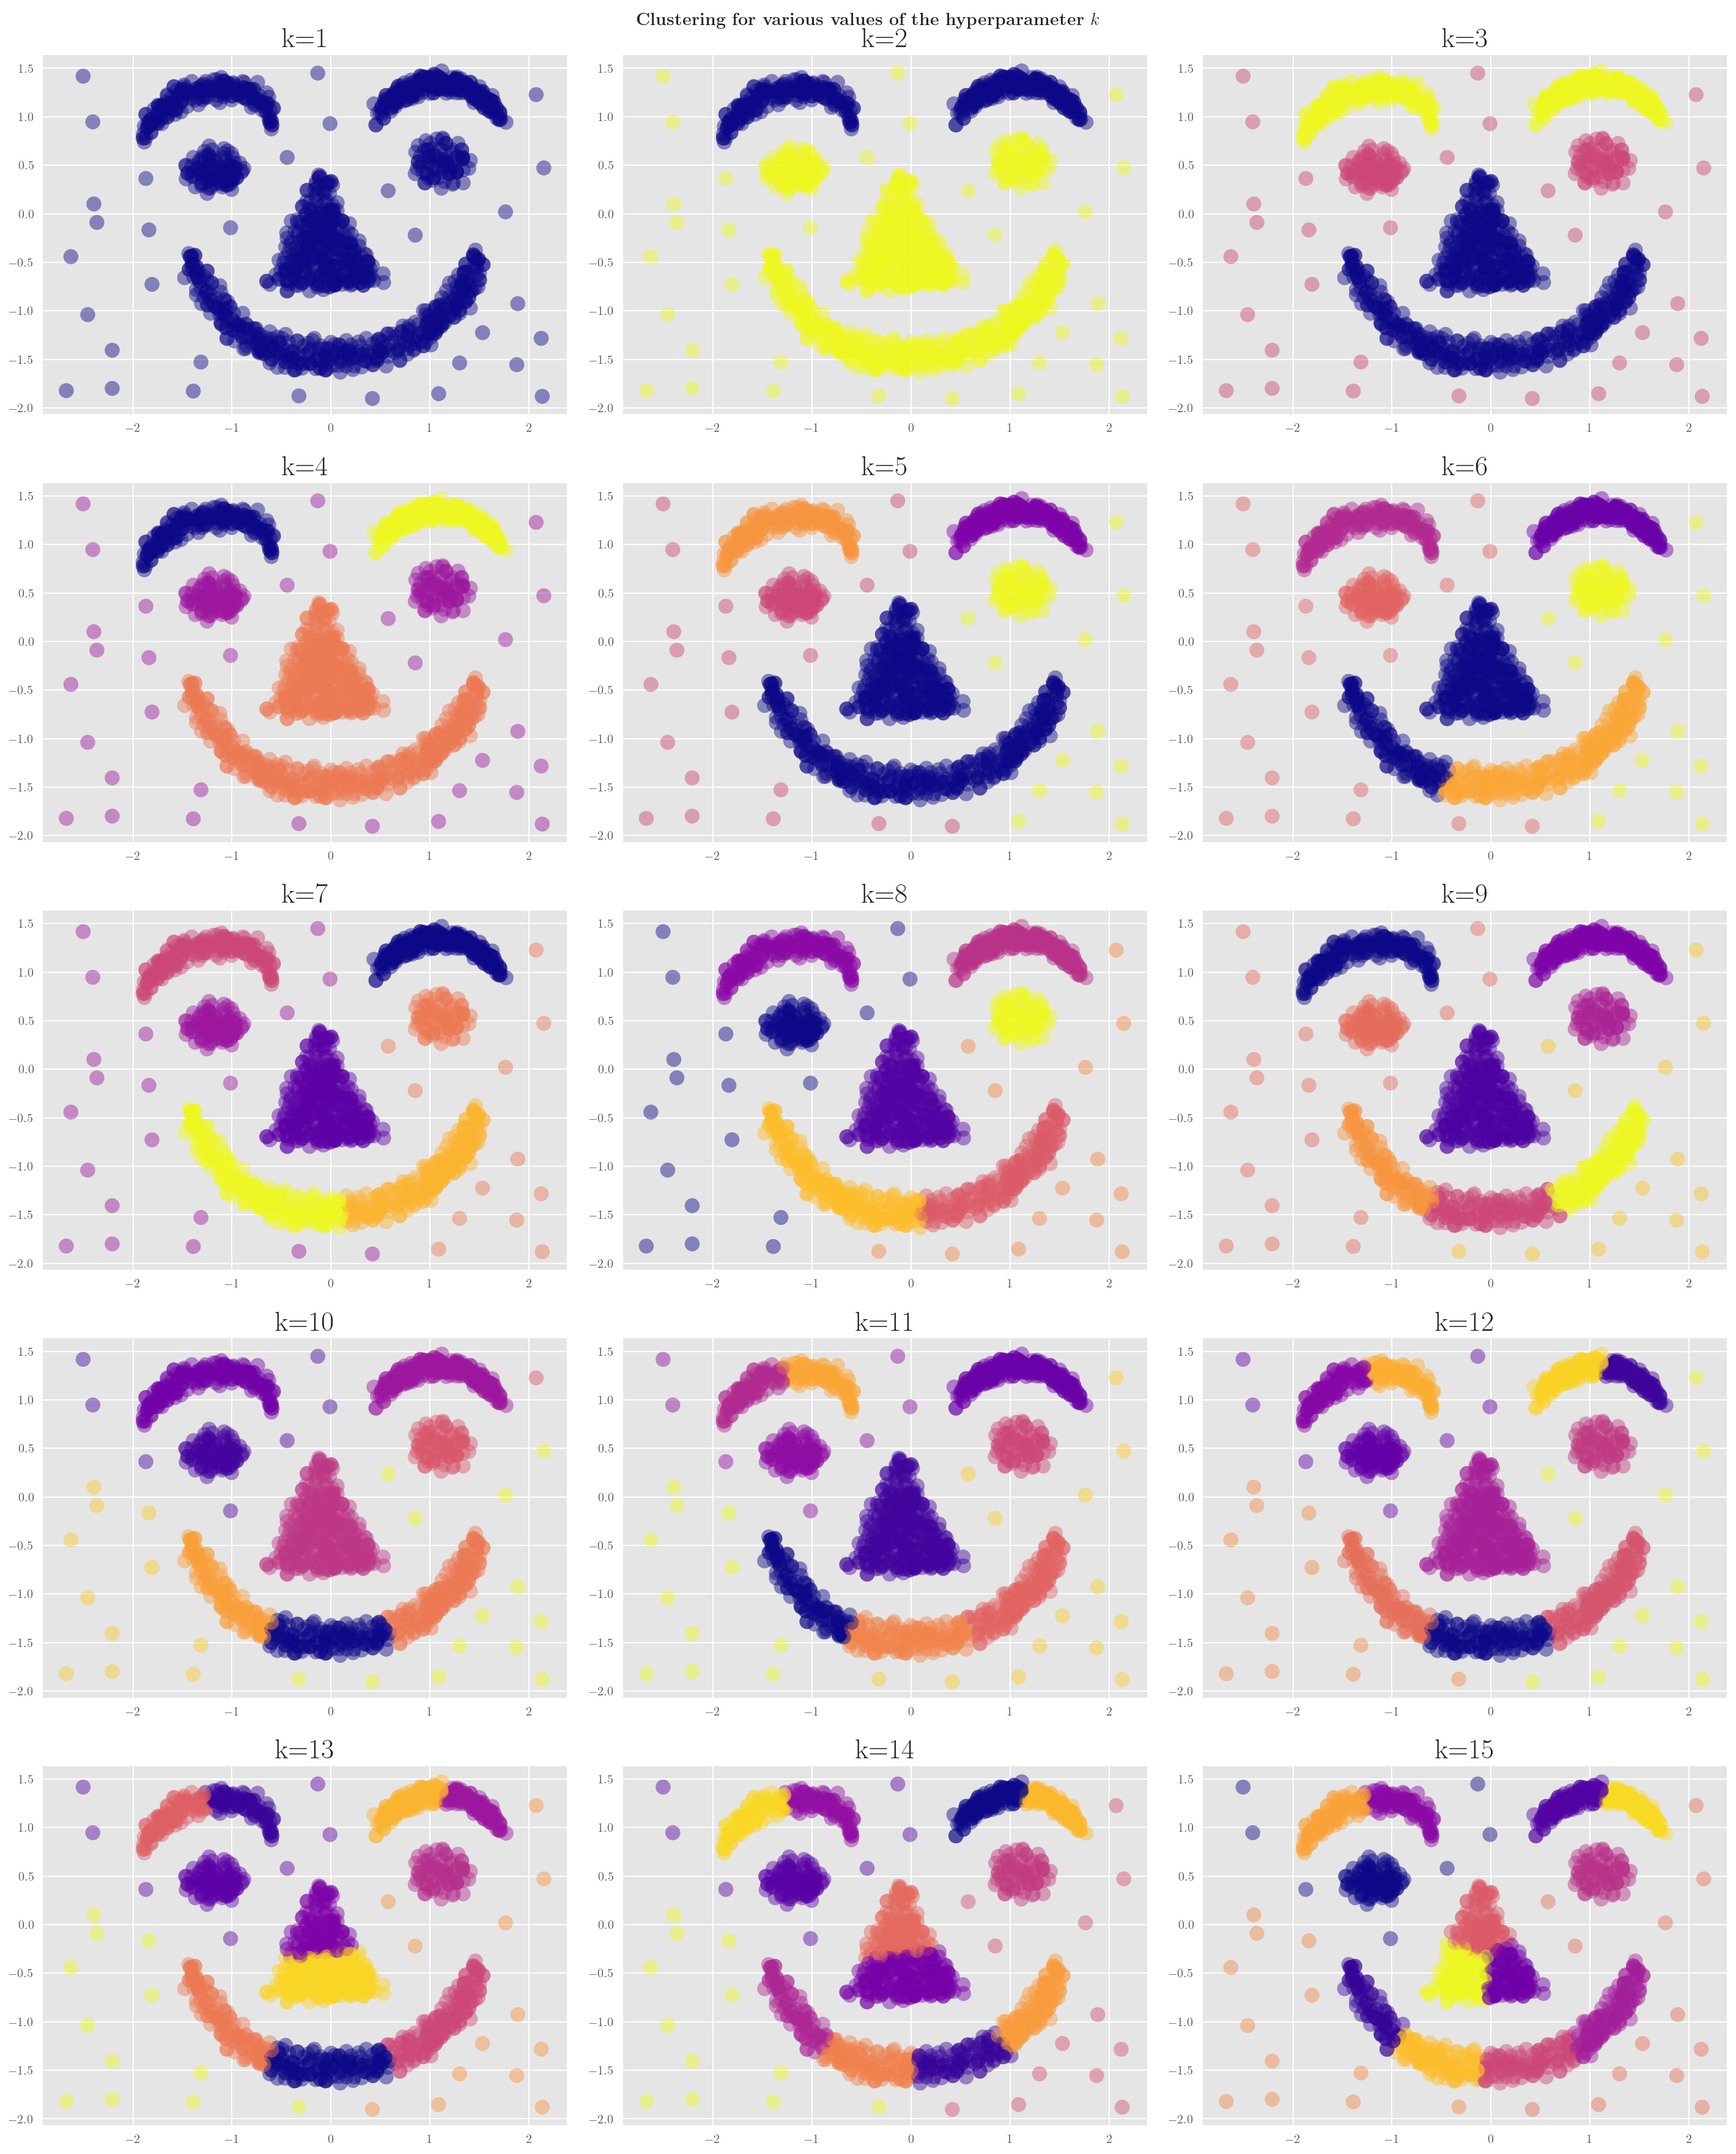

In [9]:
plt.rcParams['figure.figsize'] = (20, 25)
plot_kwds = {'alpha' : 0.45, 's' : 150, 'linewidths':0, }
X = data
wss = []
for i in range (1, 16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    kmeans.predict(X)
    y=kmeans.labels_
    wss.append(kmeans.inertia_)
    
    # Draw a plot
    fig = plt.subplot(5, 3, i)
    fig.scatter(X['x1'], X['x2'], c=y, **plot_kwds, cmap='plasma')
    title = "k={0}".format(i)
    fig.set_title(title)
plt.suptitle(r'\textbf{\Large Clustering for various values of the hyperparameter $k$}')
plt.tight_layout()
plt.show()    

### Scree plot

Visually, we see that k-means clustering is performing very poorly on this dataset. The is caused by the presence of non convex or globular clusters in the data (note the eyebrows and the lips).

Inspecting the scree-plot below, once again it is unclear what would be a good number of clusters, so the elbow is not clearly delineated.

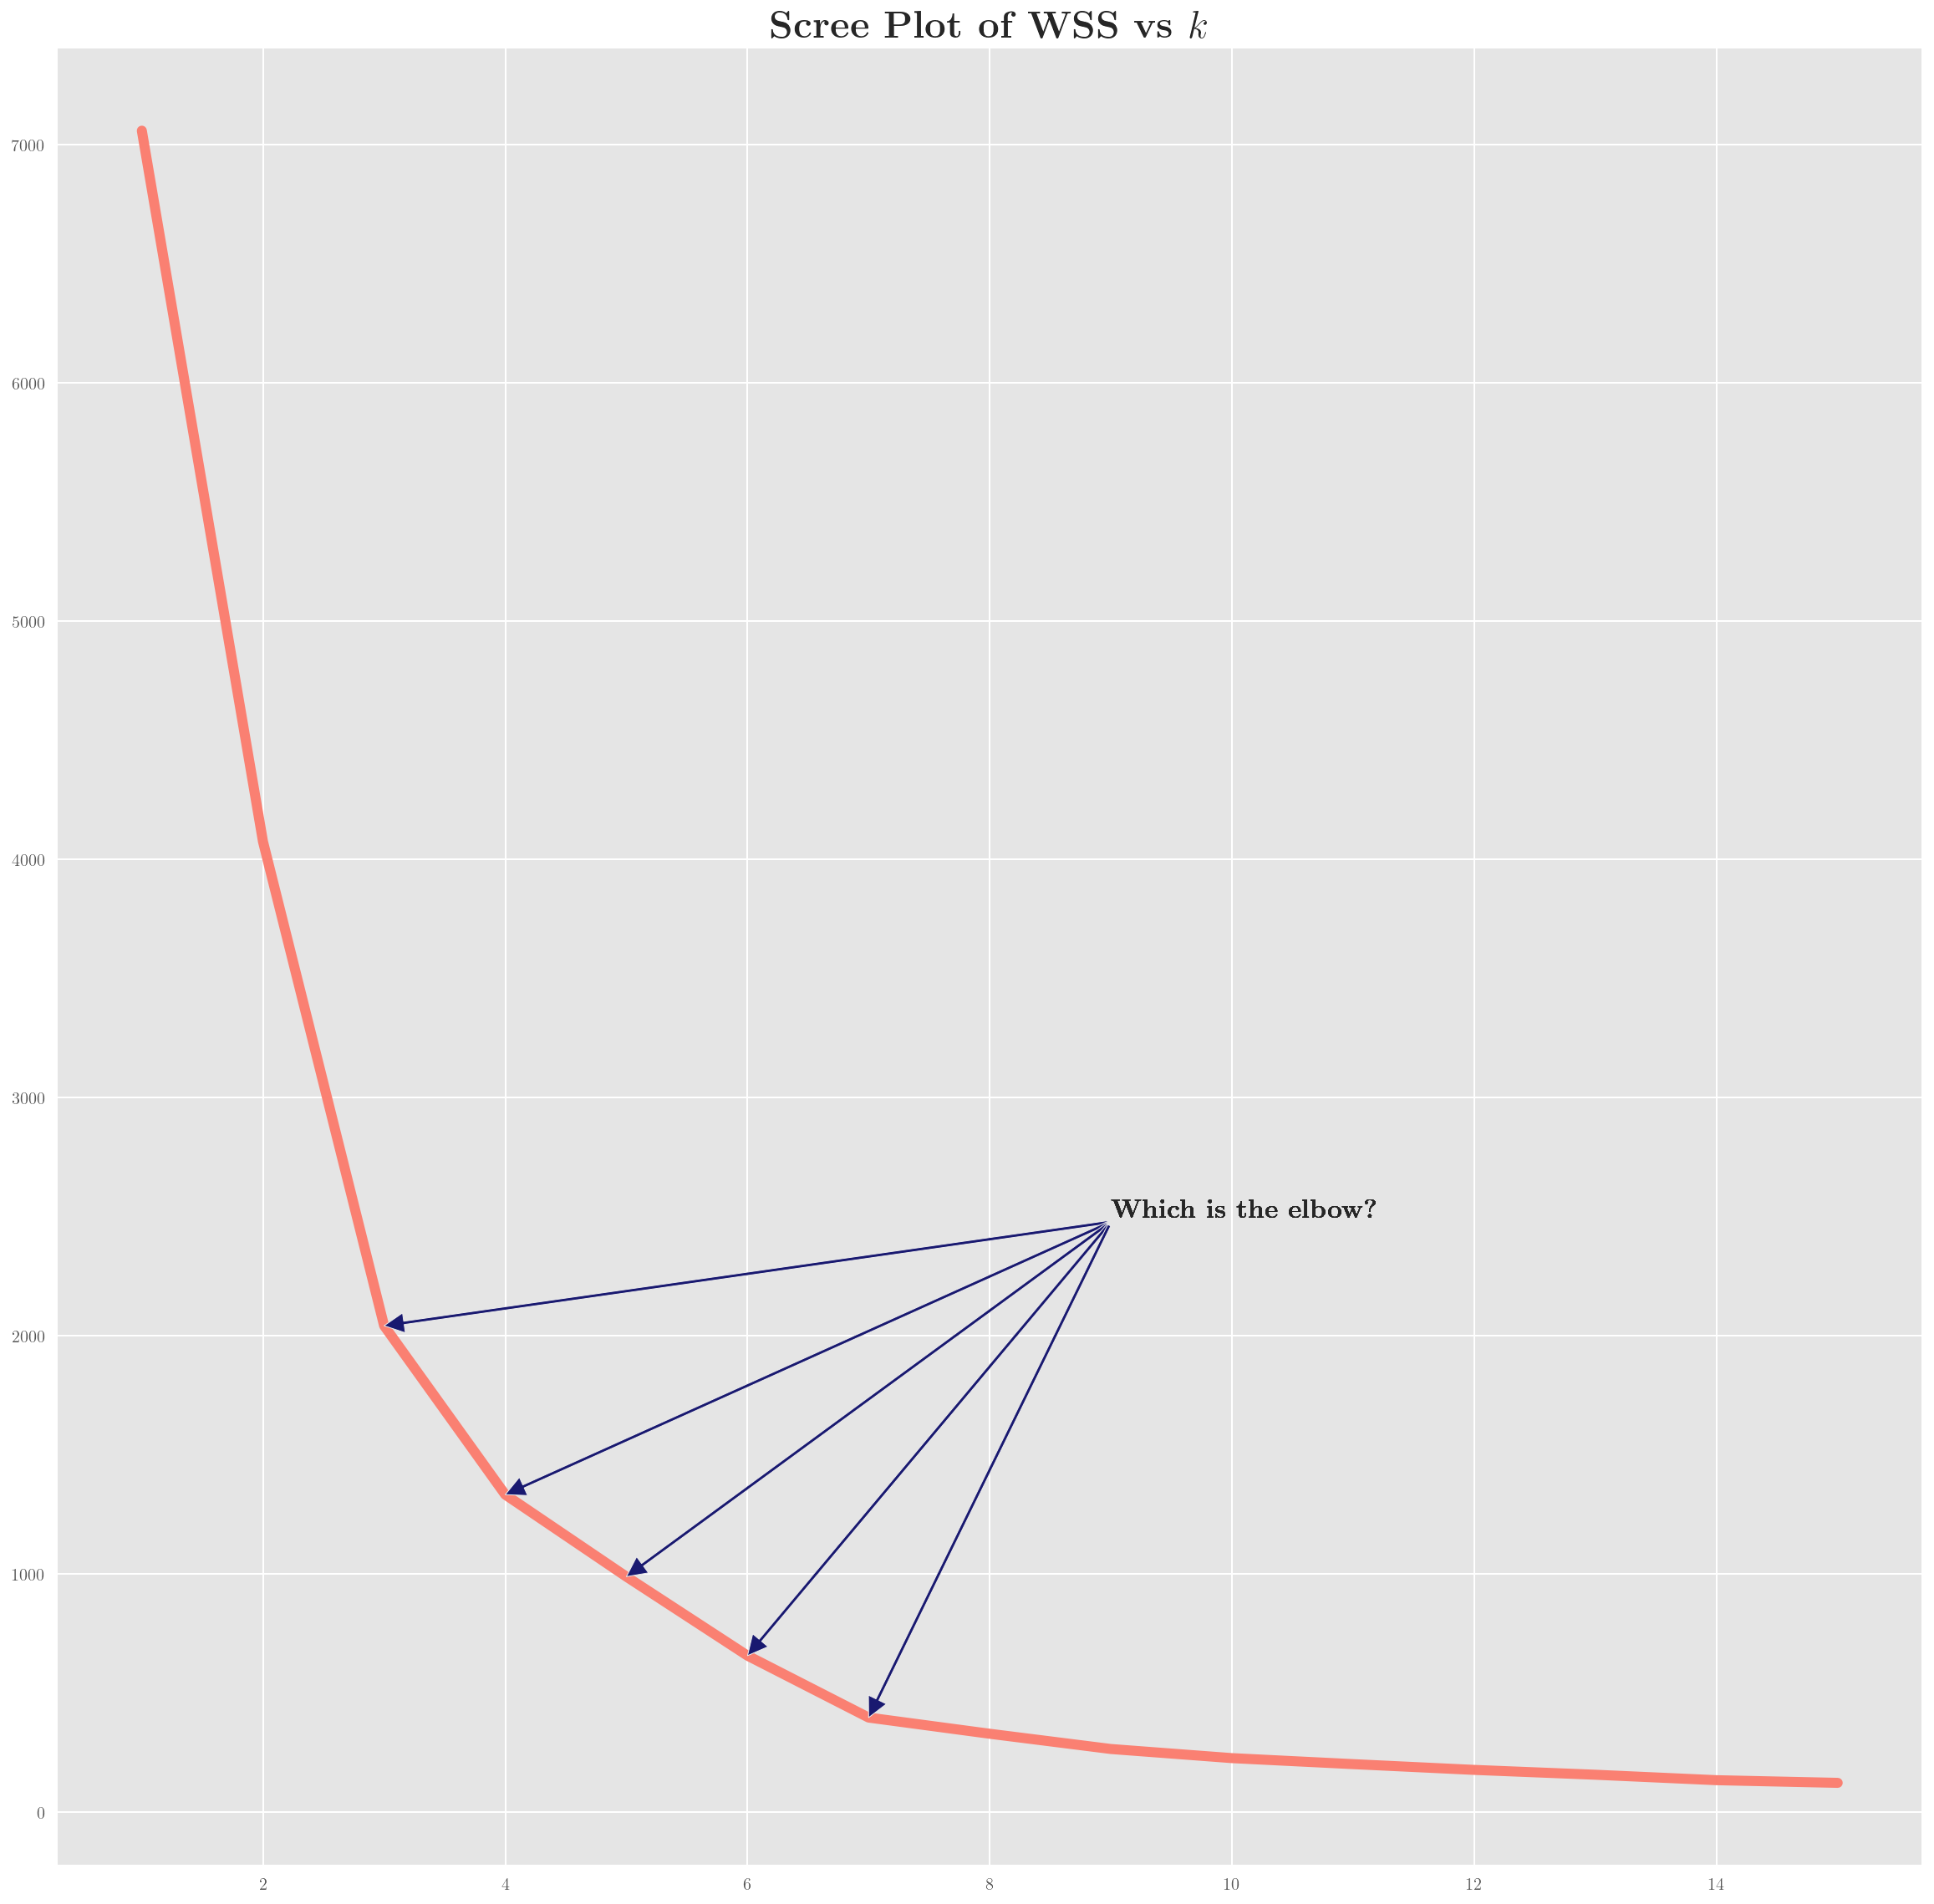

In [10]:
# Now, draw the scree-plot.
fig = plt.figure(figsize=(20, 20))
plt.plot(range(1, 16), wss, alpha=1.0, c='salmon', lw=6)
plt.grid(True)
plt.title(r'\textbf{Scree Plot of WSS vs $k$}')

# annotation to explain
for i in range(3,8):
    plt.annotate(text=r'\textbf{Which is the elbow?}',
                xy = (i,wss[i-1]),
                xytext=(9, 2500),
                arrowprops = dict(facecolor='midnightblue', width=2,)
                );